Danny Ryan
3/8/2020
Lab 8
Decision Trees


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1ATf3eoCvAKG_I2luCV2gj_GRDUXoybFR")

print(df.shape)
df.head(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
y = df['Survived']
X = df[['Pclass', 'Sex','SibSp','Parch']]

In [ ]:
X = pd.get_dummies(X)
X

,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1
...,...,...,...,...,...
886,2,0,0,0,1
887,1,0,0,1,0
888,3,1,2,1,0
889,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.1, random_state = 0) 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf = clf.fit(Xtrain,ytrain)

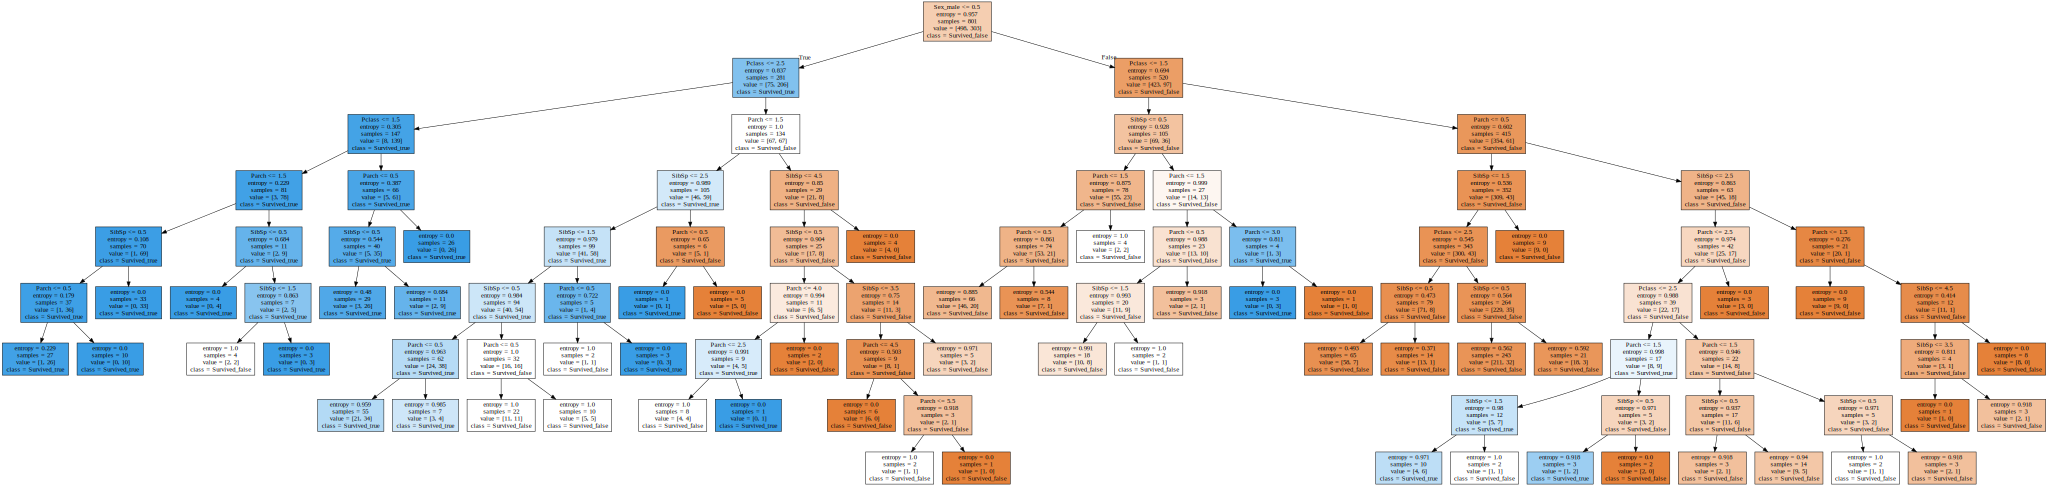

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

vis_data = export_graphviz(clf, out_file = None,
                           feature_names = Xtrain.columns,
                           class_names = ['Survived_false','Survived_true'],
                           filled = True)

graph = graphviz.Source(vis_data)
graph

In [ ]:
from sklearn.metrics import classification_report
ypred = clf.predict(Xtest)
print(classification_report(ytest, ypred))
#attempting to do the test data 


              precision    recall  f1-score   support

           0       0.76      0.86      0.81        51
           1       0.78      0.64      0.70        39

    accuracy                           0.77        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.77      0.77      0.76        90



In [ ]:
ypred1 = clf.predict(Xtrain)
print(classification_report(ytrain, ypred1))
#attempting to do the training data 

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       498
           1       0.85      0.63      0.72       303

    accuracy                           0.82       801
   macro avg       0.83      0.78      0.79       801
weighted avg       0.82      0.82      0.81       801





  -The most important attribute seems to be whether the passenger was male or female. I think this is the most important because it is the first "split" in the tree, and every row of data is then subsetted by gender. 



  -Of the leaf node with an entropy of 0, the one with the highest count of surviviors all were female,first class, and no parents or children, and there was 26 of these people, all of which survived 

  


-the accurecy of the testing data was 0.82, and the accurecy of the training data was 0.77. We can infer our model is not overfitting too much, as the margin between the two accurecies is around 0.05 points, which is to be expected as the model should be more accurete in predicting the training data, as it knows the soltions associated with the training data. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=0, criterion='entropy')

model = model.fit(Xtrain, ytrain)
ypred2 = model.predict(Xtest)

In [ ]:
print(classification_report(ytest, ypred2))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        51
           1       0.84      0.69      0.76        39

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90



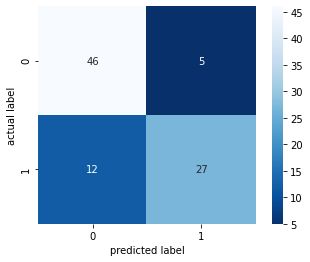

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred2)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='Blues_r',
            xticklabels=model.classes_,
            yticklabels=model.classes_)

plt.xlabel('predicted label')
plt.ylabel('actual label');

Overall, the random forest model was slighlty more accurete than the decision tree model.